# Adecuar el ambiente de desarrollo

# Habilitar Google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Instalar librerías necesarias

In [0]:
# instalar librería para visualizar el progreso de ejecución una tarea en background
pip install pyprind


# Crear funciones globales


In [0]:
#función para ver avance de proceso en background
def reporthook(count, block_size, total_size):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    progress_size = int(count * block_size)
    speed = progress_size / (1024.**2 * duration)
    percent = count * block_size * 100. / total_size
    sys.stdout.write("\r%d%% | %d MB | %.2f MB/s | %d segundos transcurrido" %
                    (percent, progress_size / (1024.**2), speed, duration))
    sys.stdout.flush()


In [0]:
#funcion para descargar cada uno de los datasets
def download_dataset(Source, Target, drivepath):
  #si no existe el directorio debe crearlo
  if not os.path.exists(drivepath):  
    os.mkdir(drivepath)
  #si no existe el archivo descarguelo de lo contrario no
  if not os.path.isfile(drivepath+'/'+Target):  
  #verificar que la versión de python
    if (sys.version_info < (3, 0)):
      import urllib
      urllib.urlretrieve(Source, drivepath+'/'+Target, reporthook)
    else:
      import urllib.request
      urllib.request.urlretrieve(Source, drivepath+'/'+Target, reporthook)
  else:
    print("The file "+drivepath+'/'+Target+" is downloaded")


# Obtener Corpus

# Importar librerías necesarias


In [0]:
import os            #  trabajar sobre el sistema operativo
import sys           #  manipular archivos (cortar, copiar, borrar, crear)
import tarfile       #  Manipular archivos comprimidos (comprimir, descomprimir)
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import gzip          #  libreria para manipular archivos .gz
import shutil        #  Operaciones de archivo de alto nivel (copiar, borrar y archivar).
import struct        #  convertir entre cadenas de bytes y tipos de datos nativos Python(números y cadenas)
import pyprind
import numpy as np


# Variables con las urls de los sources y targets



In [0]:
#Nombre de la carpeta onde guardaremos los datasets
basepath='MNISTdatasets'
#Nombre de la carpeta en Google drive donde guardaremos el proyecto
googlepath='/content/gdrive/My Drive/IA/clasificador_manuscritos/'+basepath+'/'

# dataset de entrenamiento
trainSource='http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
trainTarget='train-images-idx3-ubyte.gz'
trainLabelSource='http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
trainLabelTarget='train-labels-idx1-ubyte.gz'

#  dataset para testing
testSource='http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
testTarget='test-images-idx3-ubyte.gz' 
testLabelSource='http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
testLabelTarget='test-labels-idx1-ubyte.gz'

# Descargar los datasets (antes de ejecutar verificar que se tiene acceso a  Google drive)

In [0]:
download_dataset(trainSource,trainTarget,googlepath)
download_dataset(trainLabelSource,trainLabelTarget,googlepath)
download_dataset(testSource,testTarget,googlepath)
download_dataset(testLabelSource,testLabelTarget,googlepath)

180% | 0 MB | 90.27 MB/s | 0 segundos transcurrido

# Extraemos todos los archivos del corpus  (primer método)

In [0]:
def write_file(filename, data):
  try:
    f = open(filename, "wb")
  except IOError as e:
    print (e.errno +"->"+ e.message)
  else:
    f.write(data)
    f.close()

def decompress(filename):
  if os.path.exists(filename):
    if filename.lower().endswith(".gz"):
      f = gzip.open(filename)
      write_file(filename[:filename.rfind(".gz")], f.read())
      f.close()
      print("extract finish->"+filename)
  else:
    print("No se ha encontrado ningún archivo.")


# Extraemos todos los archivos del corpus  (primer método)

In [0]:
decompress(googlepath+trainTarget)
decompress(googlepath+trainLabelTarget)
decompress(googlepath+testTarget)
decompress(googlepath+testLabelTarget)


extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/train-images-idx3-ubyte.gz
extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/train-labels-idx1-ubyte.gz
extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/test-images-idx3-ubyte.gz
extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/test-labels-idx1-ubyte.gz


# Extraemos todos los archivos del corpus  (segundo método)

In [0]:
#segundo metodo para descromprimir archivo gz
if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'
#listamos los archivos .gz que se van a descomprimir
zipped_mnist = [f for f in os.listdir(googlepath) if f.endswith('ubyte.gz')]
for filename in zipped_mnist:
    filename=googlepath+filename
    with gzip.GzipFile(filename, mode='rb') as decompressed, open(filename[:-3], writemode) as outfile:
        outfile.write(decompressed.read())
        print("extract finish->"+filename)


extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/train-images-idx3-ubyte.gz
extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/train-labels-idx1-ubyte.gz
extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/test-images-idx3-ubyte.gz
extract finish->/content/gdrive/My Drive/IA/clasificador_manuscritos/MNISTdatasets/test-labels-idx1-ubyte.gz


# Visualizar parte de la data

In [0]:
def load_mnist(path, kind='train'):
    # cargamos la data de MNIST desde el path de googledrive
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        # forma como leeremos las imagenes
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels


In [0]:
X_train, y_train =load_mnist(googlepath, kind='train')
print('train--->filas: %d, columnas: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist(googlepath, kind='test')
print('Test--->filas: %d, columnas: %d' % (X_test.shape[0], X_test.shape[1]))


train--->filas: 60000, columnas: 784
Test--->filas: 10000, columnas: 784


# Aspectos de las imágenes

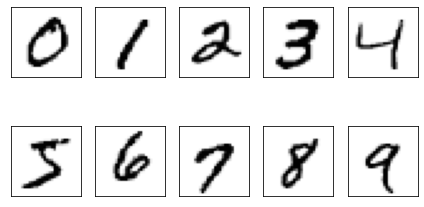

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


# Visualizaremos las imágenes del MNIST, usando la función imshow de Matplotlib

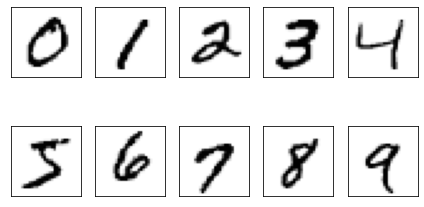

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


# Visualicemos 25 diferentes versiones del número siete(7)

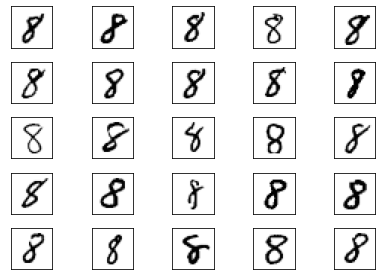

In [0]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 8][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


# Exportando objetos tipo numpy

In [0]:
np.savez_compressed(googlepath+'mnist_scaled.npz', 
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)


# Para cargar las matrices numpy solo basta usar la función load

In [0]:
mnist = np.load(googlepath+'mnist_scaled.npz')
mnist.files


['X_train', 'y_train', 'X_test', 'y_test']

# Para asignar una matriz a una variable solo usamos el siguiente código

In [0]:
X_train,y_train,X_test,y_test=[mnist[f] for f in ['X_train','y_train','X_test','y_test']]
#eliminamos la variable para optimizar memoria
del mnist 
X_train.shape


(60000, 784)

# Paso 5.1 Cambiar el basepath del S.O

In [0]:
import os
#obtener el basepath por defecto
cwd = os.getcwd() 
print("basepath por defecto es: ", cwd)


basepath por defecto es:  /content


In [0]:
os.chdir('/content/gdrive/My Drive/IA/clasificador_manuscritos/')
cwd = os.getcwd() 
print(" El basepath por defecto ahora es: ", cwd)

# os.chdir('/content/gdrive/My Drive/IA/clasificador_manuscritos/')


 El basepath por defecto ahora es:  /content/gdrive/My Drive/IA/clasificador_manuscritos


# Configurar la RNA multicapa (MLP)


# Archivo neuralnet

In [0]:
from neuralnet import NeuralNetMLP

n_epochs = 200
nn = NeuralNetMLP(n_hidden=100, 
                  l2=0.01, 
                  epochs=200, 
                  eta=0.0005,
                  minibatch_size=100, 
                  shuffle=True,
                  seed=1)


#  Entrenar la MLP

In [0]:
nn.fit(X_train=X_train[:55000], 
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])


200/200 | Cost: 5065.78 | Train/Valid Acc.: 99.28%/97.98% 

# Ver los resultados

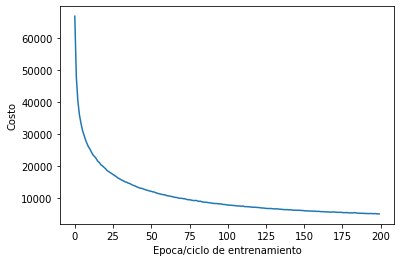

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Costo')
plt.xlabel('Epoca/ciclo de entrenamiento')
plt.show()


In [0]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
       .astype(np.float) / X_test.shape[0])

print('presición(accuracy) en los datos de prueba: %.2f%%' % (acc * 100))


presición(accuracy) en los datos de prueba: 97.54%


# Visualizando la predicción

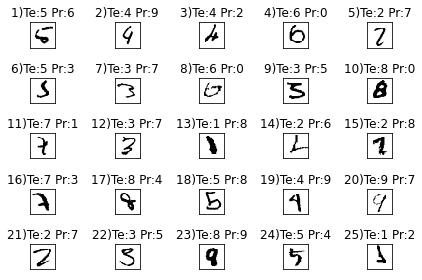

In [0]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d)Te:%d Pr:%d' % (i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


# Ver los resultados

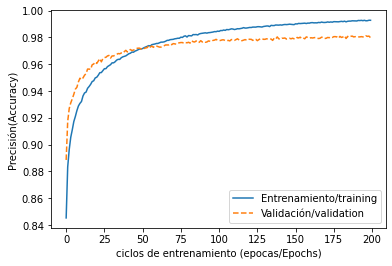

In [0]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='Entrenamiento/training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='Validación/validation', linestyle='--')
plt.ylabel('Precisión(Accuracy)')
plt.xlabel('ciclos de entrenamiento (epocas/Epochs)')
plt.legend()
#plt.savefig('images/12_08.png', dpi=300)
plt.show()
